In [ ]:
# ### mount on google drive if you running the code on colab
# from google.colab import drive
# drive.mount('/content/drive/')
# import os
# os.chdir("/content/drive/My Drive/WatNet/notebooks")


In [49]:
import os
os.chdir('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# had to change utils to my_utils cause it has the same name with the one in my python environment 
from my_utils.geotif_io import readTiff, writeTiff
from my_utils.acc_pixel import acc_matrix
from watnet_infer import watnet_infer
# pip install tensorflow


In [29]:
import sys
# sys.path.append('h:\\My Drive\\Code\\Projects\\WatNet\\my_utils')  # Replace '/path/to/parent/directory' with the actual path
# print(sys.path)
# sys.path.append('h:\\My Drive\\Code\\Projects\\WatNet') 
# sys.path.append('h:\\My Drive\\Code\\Projects\\WatNet\\notebooks') 
# print(sys.path)
# # Remove a specific directory from sys.path
# path_to_remove = '/path/to/remove'
# if path_to_remove in sys.path:
#     sys.path.remove(path_to_remove)
# Get the current working directory and print 
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: h:\


In [73]:
## test image and test sample
path_S2_img = 'H:/My Drive/Code/Projects/WatNet/data/test-demo/T49QGF_20191017_6Bands_Urban_Subs.tif'
path_result_map = 'H:/My Drive/Code/Projects/WatNet/data/test-demo/T49QGF_20191017_6Bands_Urban_Subs_water.tif'

# pre-trained model
watnet_model = 'H:/My Drive/Code/Projects/WatNet/model/pretrained/watnet.h5'
## super parameters
patch_size = 512
overlay = 80  # the overlay area between neighboring patches


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


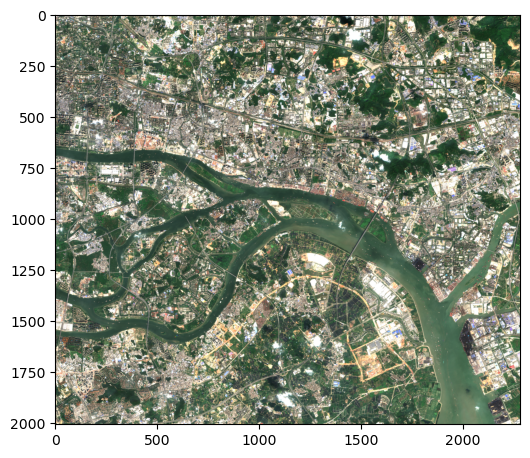

In [57]:
# -----Load and prepare the satellite image data -----#
sen2_img, img_info = readTiff(path_in=path_S2_img)
sen2_img = np.clip(sen2_img/10000, a_min=0, a_max=1) ## normalization
plt.figure(figsize=(6,6))
plt.imshow(sen2_img[:, :, (2,1,0)]*5)
# TypeError: only size-1 arrays can be converted to Python scalars
    # sen2_img = float(np.clip(sen2_img/10000, a_min=0, a_max=1))  ## normalization  



# print(np.__version__)

# resolve an issue 
#     x = np.float(3.14)
#     x = float(3.14)
#     print(x)

In [68]:
### ---- surface water mapping by using pretrained watnet.
water_map = watnet_infer(rsimg=sen2_img, path_model = watnet_model)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


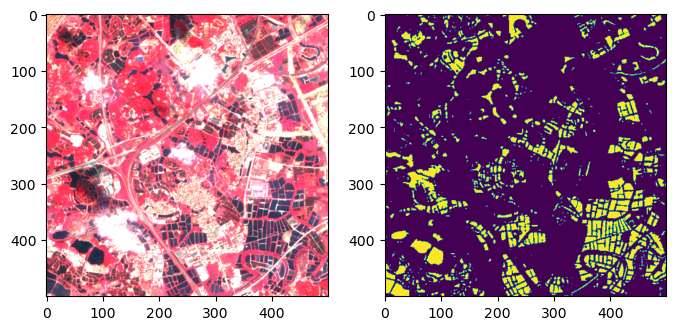

In [69]:
### show the result
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(sen2_img[1500:2000, 1000:1500, (3,2,1)]*6.5)
plt.subplot(1,2,2)
plt.imshow(water_map[1500:2000, 1000:1500, 0])


OA: 1.0
Producer acc: 1.0
user acc: 1.0
Confusion matrix: [[259   0]
 [  0 234]]


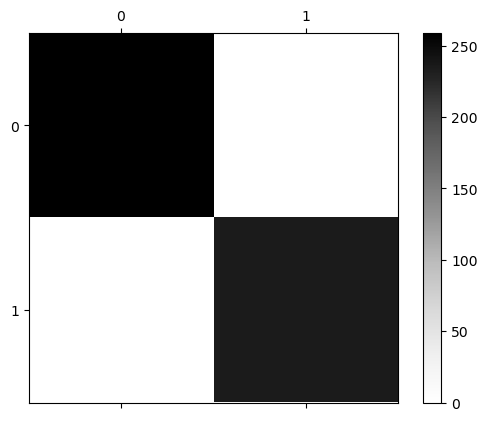

In [71]:
## show the accuracy
path_sam = 'H:/My Drive/Code/Projects/WatNet/data/test-demo/val_sam.csv'
df_sam = pd.read_csv(path_sam, header=0)
acc_oa, acc_prod, acc_user, confus_mat = acc_matrix(water_map, df_sam.to_numpy(), id_label=1)
print('OA:', acc_oa)
print('Producer acc:', acc_prod)
print('user acc:', acc_user)
print('Confusion matrix:', np.around(confus_mat,4))
plt.matshow(confus_mat,cmap=plt.cm.Greys, fignum=0)
plt.colorbar()


### Save the result.

In [74]:
img_info

{'geoextent': (738710.0, 761530.0, 2544530.0, 2564600.0),
 'geotrans': (738710.0, 10.0, 0.0, 2564600.0, 0.0, -10.0),
 'geosrs': '32649',
 'row': 2007,
 'col': 2282,
 'bands': 6}

In [75]:
# # save the result
writeTiff(im_data = water_map.astype(np.int8), 
          im_geotrans = img_info['geotrans'], 
          im_geosrs = img_info['geosrs'], 
          path_out = path_result_map)
